In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from datetime import datetime, timedelta

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from ydata_profiling import ProfileReport
sns.set_style("whitegrid")
np.random.seed(42)

1. Tìm hiểu, trực quan hóa và phân tích về bộ dữ liệu

In [5]:
#Đọc file 
df1 = pd.read_csv('data/nflx_2014_2023.csv')
df1.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002


In [6]:
df1.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14',
       'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd',
       'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [8]:
df1.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,274.455767,278.638946,270.124592,274.487023,1.049230e+07,53.399584,53.424079,11.920763,15.705041,270.416745,270.522273,266.760420,266.813442,1.151103,272.865067,9.249735,9.231142,9.206930,274.652630
std,166.005094,168.205188,163.612279,165.902954,9.173072e+06,17.763862,13.088270,100.831995,111.396602,164.404981,163.454752,163.189487,161.050027,9.655979,165.259896,8.414224,6.141865,5.898383,165.888569
min,44.605713,45.842857,42.785713,44.887142,1.144000e+06,4.374756,9.152344,-233.333333,-424.012878,49.679943,49.409771,46.385428,46.650698,-59.233806,47.643571,0.599998,1.090197,1.206072,44.887142
25%,109.982502,111.887501,107.117498,110.064998,5.017050e+06,40.015924,43.731175,-74.565801,-71.870319,107.627900,105.923105,105.662982,102.490532,-1.929731,106.655000,3.102141,3.349633,3.351988,110.122497
50%,288.000000,292.690002,282.660004,288.229995,7.795950e+06,53.953919,53.668026,25.632766,27.165946,286.034599,287.382611,287.634151,291.379066,1.535425,284.444750,7.830006,9.445428,9.852787,288.284988
75%,384.542511,391.317505,377.795006,384.560005,1.299060e+07,67.151119,63.378696,94.212764,100.321908,376.592201,381.284113,365.740875,369.343945,5.693881,380.708376,12.715011,13.227332,13.211536,384.857491
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08,96.305710,91.547868,233.333333,356.795719,648.592997,642.765550,616.771798,610.750059,24.347344,672.126996,136.099990,35.221811,27.809882,691.690002


In [9]:
df1.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df1['date']=pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year
df1 = df1.set_index('date')
years = list(df1['year'].unique())

In [12]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()

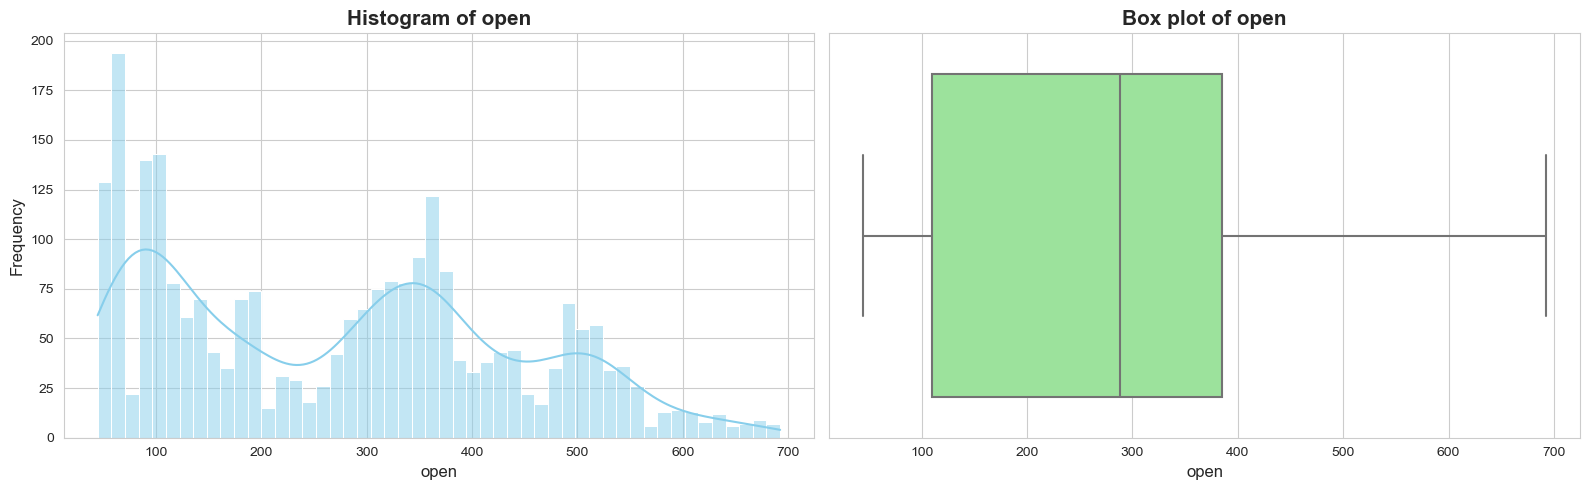

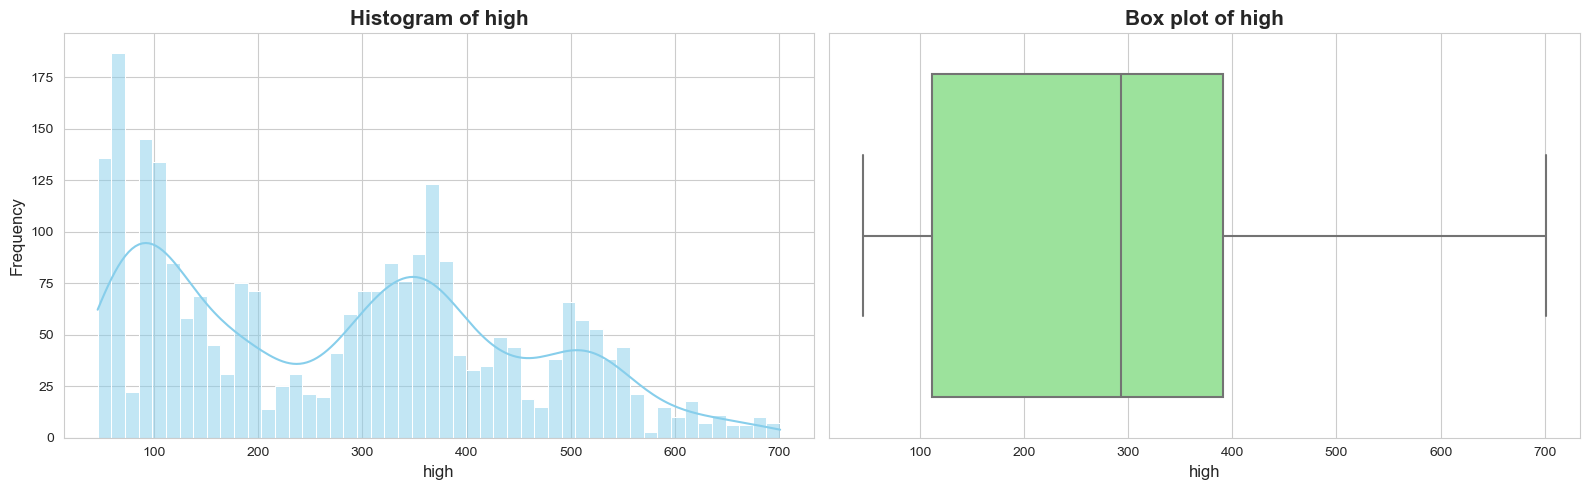

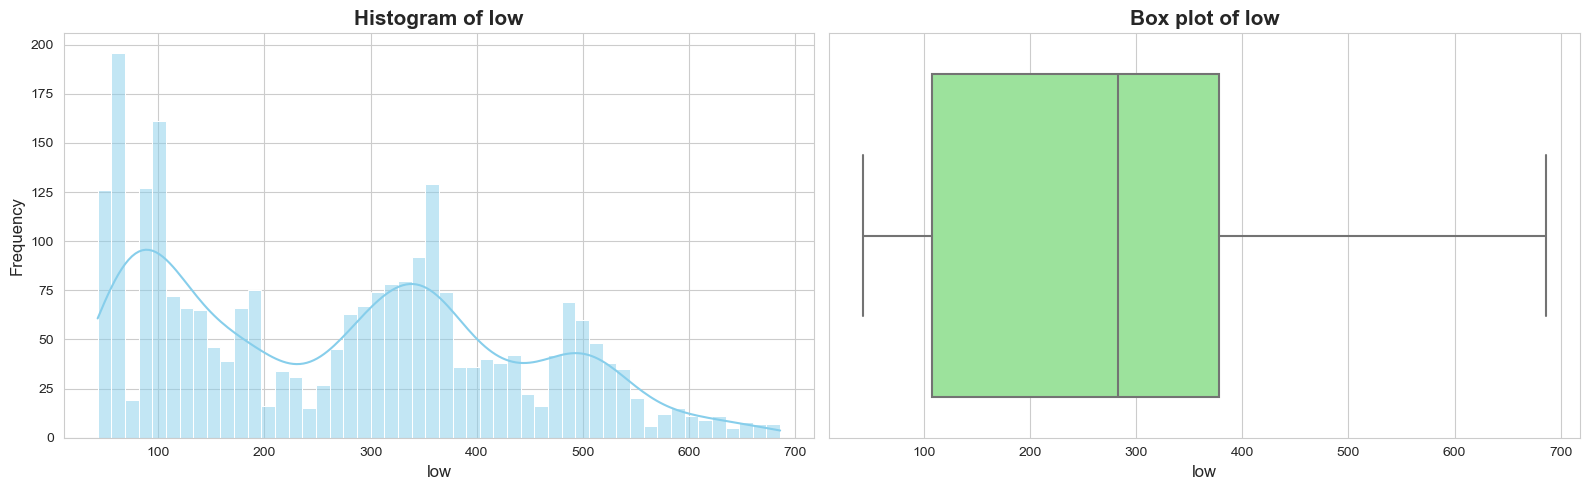

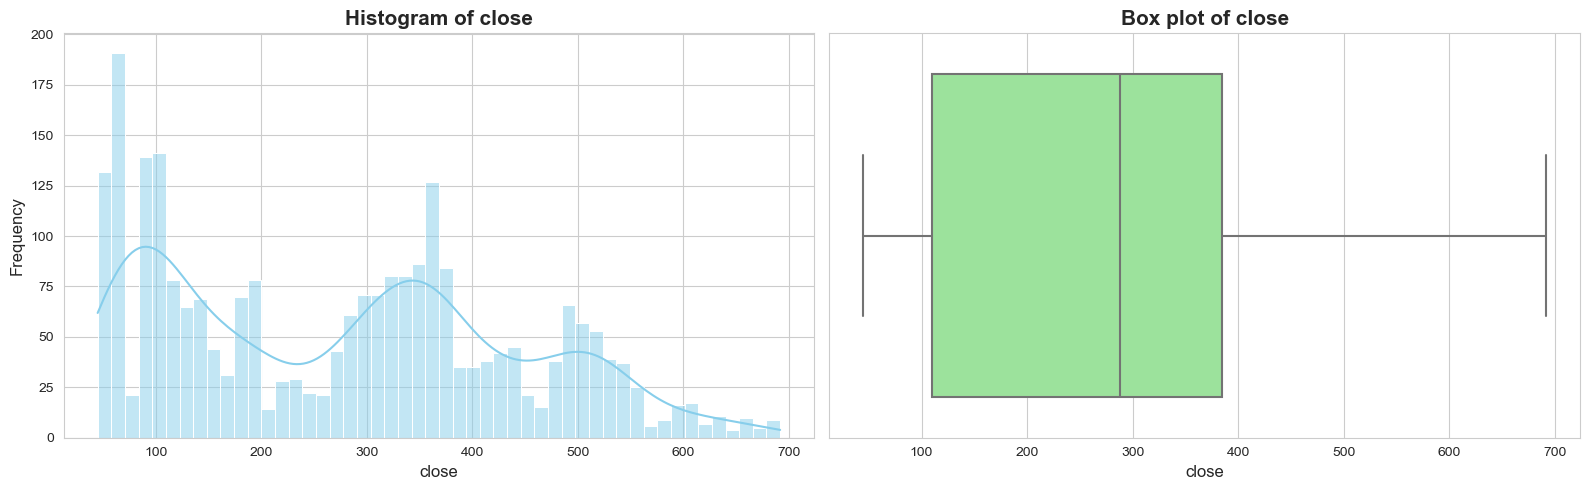

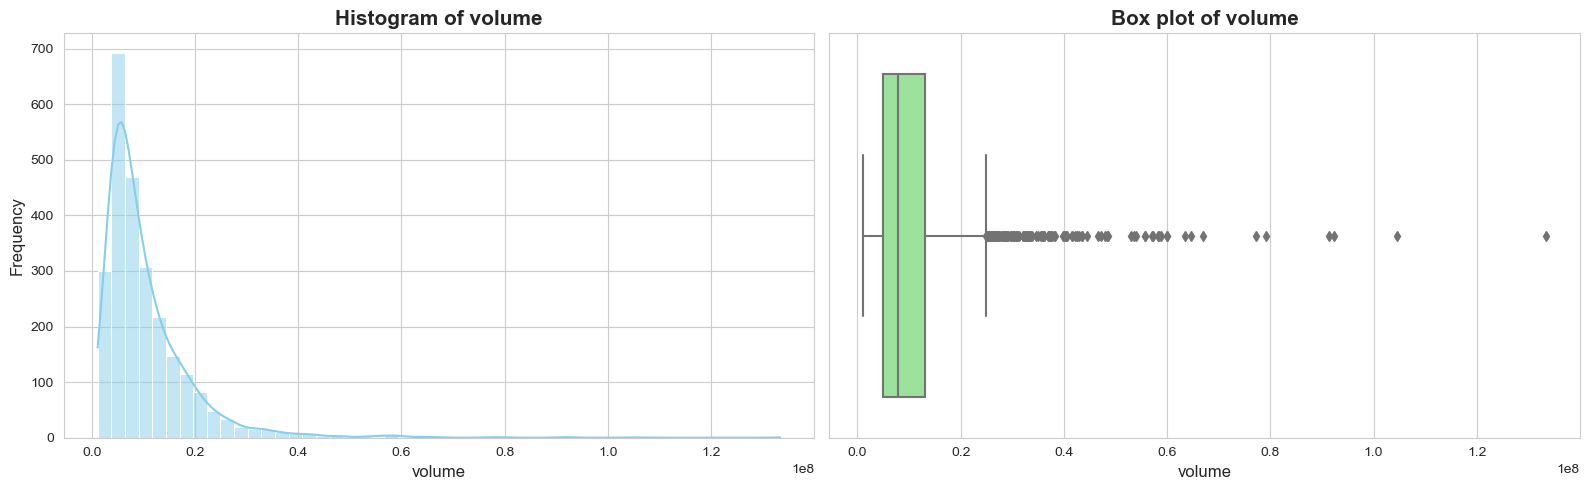

In [13]:
num_cols=['open','high','low','close','volume']
plot_numerics(df1[num_cols])

In [14]:
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
#
def plotCyc(num_cols,tag):
    names = cycle(num_cols)
    df = pd.read_csv('data/nflx_2014_2023.csv')
    fig = px.line(df, x=df.date, y=[df['open'], df['close'], 
                                              df['high'], df['low']],
                 labels={'date': 'Date','value':'Stock value'})
    fig.update_layout(title_text='Analysis chart - '+tag, font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    fig.show()

In [15]:
num_cols=['Open Price','Close Price','High Price','Low Price']
plotCyc(num_cols,'Prices')

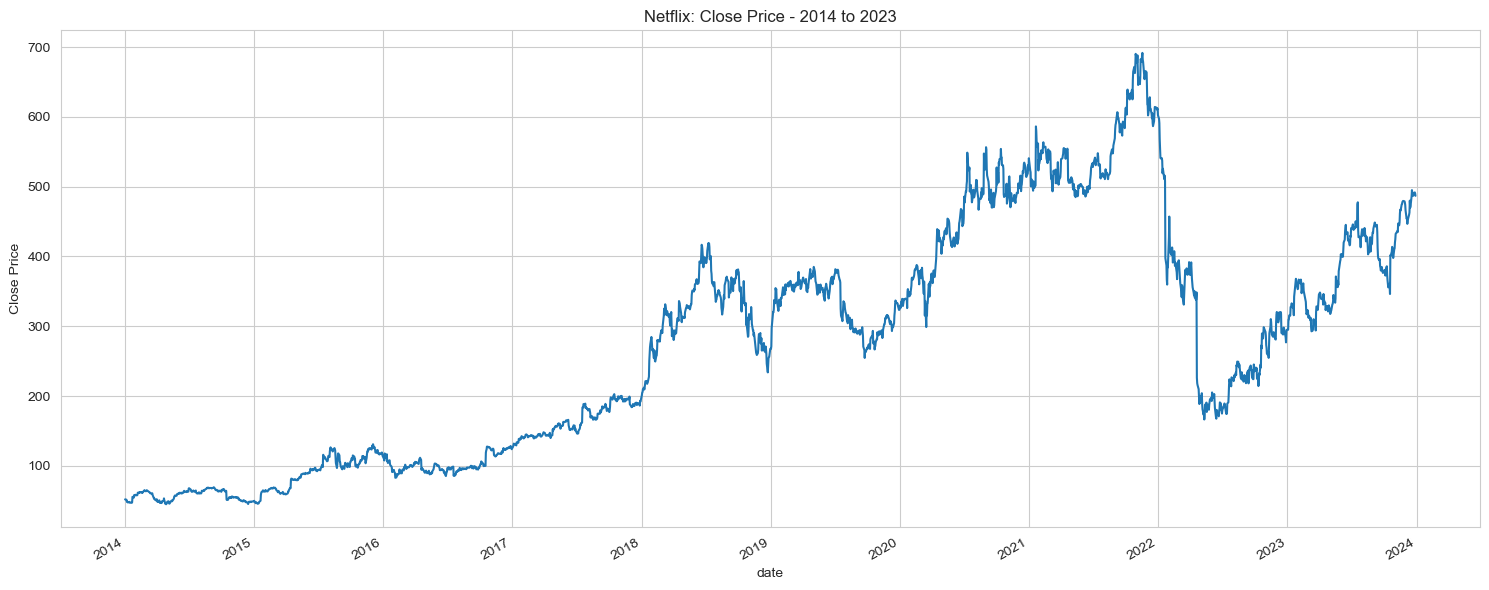

In [16]:
a = list(df1['year'].unique())
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('date')
plt.title("Netflix: Close Price - 2014 to 2023")
df1['close'].plot()

plt.tight_layout()

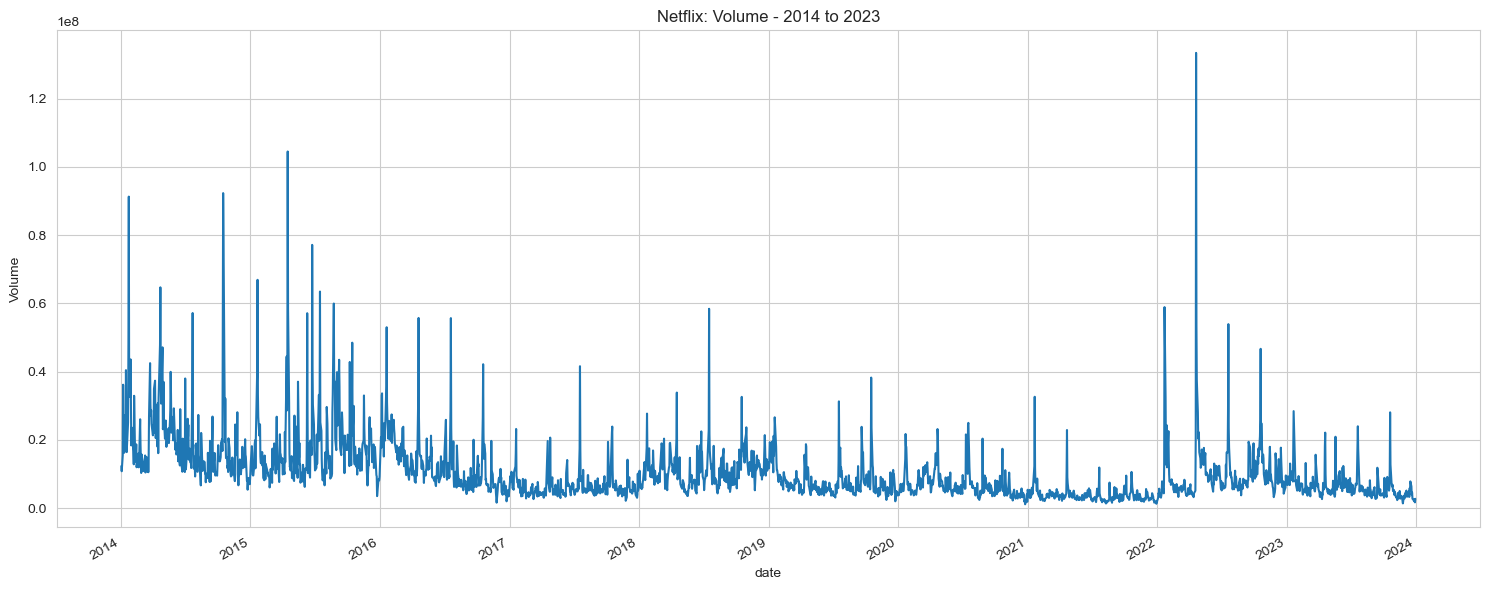

In [17]:
plt.figure(figsize=(15, 6))
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"Netflix: Volume - 2014 to 2023")
df1['volume'].plot()
plt.tight_layout()

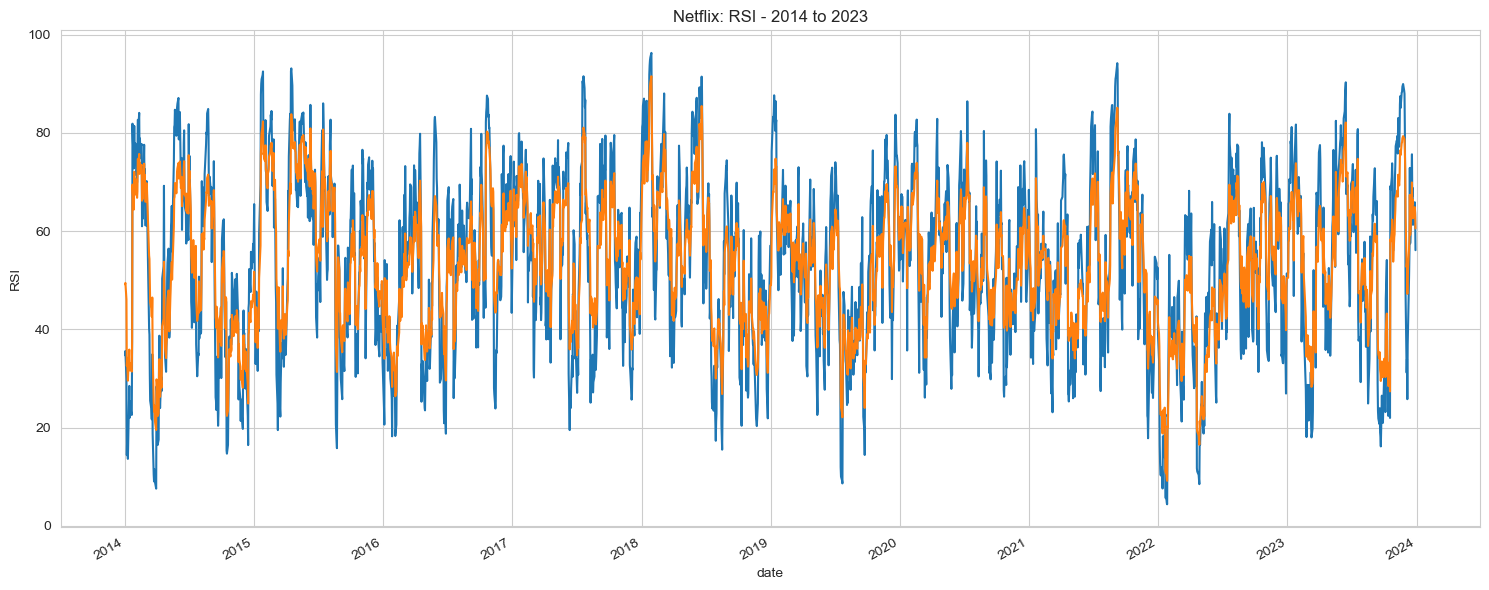

In [18]:
plt.figure(figsize=(15, 6))
plt.ylabel('RSI')
plt.xlabel('Date')
plt.title(f"Netflix: RSI - 2014 to 2023")
df1['rsi_7'].plot()
df1['rsi_14'].plot()
plt.tight_layout()

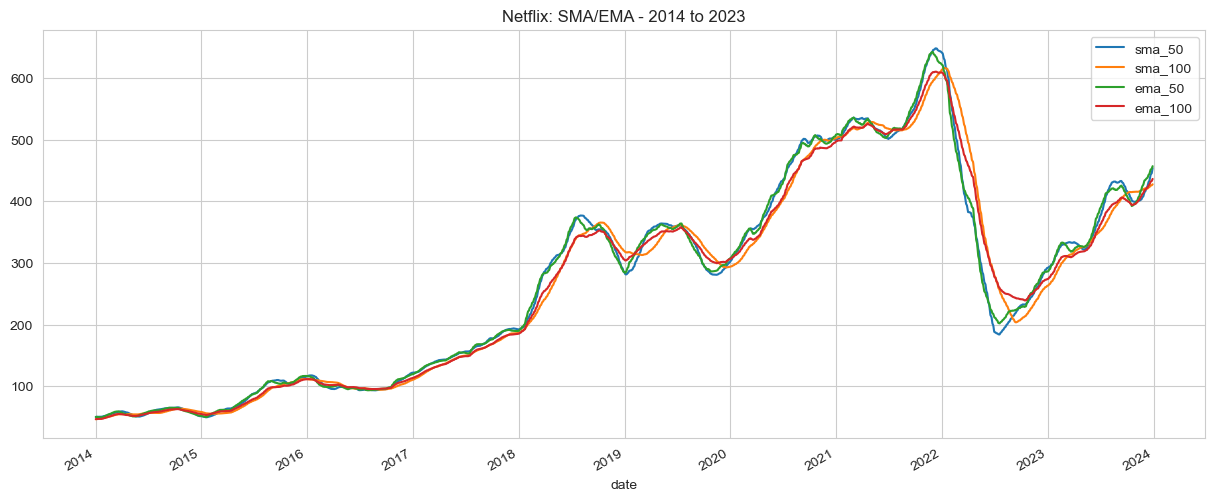

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(15)
df1[['sma_50','sma_100','ema_50','ema_100']].plot(ax=axes)
axes.set_title('Netflix: SMA/EMA - 2014 to 2023')
plt.show()

2. Tiến hành phân tích, tính toán, áp dụng các mô hình học máy

In [57]:
def evaluate_models(X, y):
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge Regression', Ridge()),
        ('Lasso Regression', Lasso()),
        ('ElasticNet', ElasticNet()),
        ('Decision Tree Regressor', DecisionTreeRegressor()),
        ('Random Forest Regressor', RandomForestRegressor()),
        ('Support Vector Machine Regressor', SVR()),
        ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
        ('Gradient Boosting Regressor', GradientBoostingRegressor()),
        ('XGBoost Regressor', XGBRegressor()),
        ('LightGBM Regressor', LGBMRegressor())
    ]

    pipelines = {name: Pipeline([('scaler', MinMaxScaler()), (name, model)]) for name, model in models}

    results = {}
    for name, pipeline in pipelines.items():
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)
        results[name] = {'RMSE': rmse, 'R2': r2}
    
    results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
    results_df.rename(columns={'index': 'Model'}, inplace=True)

    return results_df

In [58]:
df = pd.read_csv('data/nflx_2014_2023.csv')
df.drop(columns=['date'], inplace=True)
# df.drop(columns=['date', 'rsi_7', 'cci_7', 'sma_50', 'ema_50', 'atr_7', 'cci_14', 'sma_100', 'ema_100', 'TrueRange', 'atr_14'], inplace=True)

In [22]:
df.corr()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
open,1.000000,0.999645,0.999650,0.999239,-0.445853,0.008854,0.014857,0.006695,0.020683,0.979389,0.984157,0.951921,0.964898,0.145962,0.992879,0.583908,0.797201,0.826707,0.997998
high,0.999645,1.000000,0.999553,0.999663,-0.440985,0.012897,0.016791,0.013078,0.024407,0.979663,0.984391,0.952441,0.965408,0.144232,0.992911,0.594133,0.802593,0.831149,0.998388
low,0.999650,0.999553,1.000000,0.999642,-0.451084,0.017771,0.022478,0.016164,0.028413,0.978300,0.983173,0.950529,0.963661,0.150352,0.992185,0.573761,0.790481,0.821206,0.998424
close,0.999239,0.999663,0.999642,1.000000,-0.445105,0.021388,0.023903,0.020453,0.030523,0.978669,0.983480,0.951190,0.964255,0.147922,0.992252,0.584546,0.796457,0.826082,0.998672
volume,-0.445853,-0.440985,-0.451084,-0.445105,1.000000,-0.032914,-0.060225,0.000336,-0.026485,-0.426803,-0.430221,-0.416120,-0.423668,-0.099577,-0.433995,0.111331,-0.179778,-0.246386,-0.446738
rsi_7,0.008854,0.012897,0.017771,0.021388,-0.032914,1.000000,0.936766,0.787148,0.900881,-0.107102,-0.095004,-0.122633,-0.111714,0.522970,-0.074260,-0.111469,-0.146664,-0.144809,0.021233
rsi_14,0.014857,0.016791,0.022478,0.023903,-0.060225,0.936766,1.000000,0.624894,0.793323,-0.132126,-0.114036,-0.168823,-0.148208,0.696121,-0.071907,-0.130490,-0.186684,-0.194637,0.024001
cci_7,0.006695,0.013078,0.016164,0.020453,0.000336,0.787148,0.624894,1.000000,0.834564,-0.055921,-0.051868,-0.060863,-0.056972,0.217343,-0.045876,-0.069860,-0.074961,-0.070364,0.020771
cci_14,0.020683,0.024407,0.028413,0.030523,-0.026485,0.900881,0.793323,0.834564,1.000000,-0.072623,-0.065167,-0.082965,-0.074774,0.383689,-0.054143,-0.094209,-0.109631,-0.102228,0.030702
sma_50,0.979389,0.979663,0.978300,0.978669,-0.426803,-0.107102,-0.132126,-0.055921,-0.072623,1.000000,0.999112,0.987705,0.992747,-0.051112,0.992168,0.610257,0.835237,0.866540,0.977288


In [23]:
df.drop(columns=['rsi_7', 'cci_7', 'sma_50', 'ema_50', 'atr_7', 'cci_14', 'sma_100', 'TrueRange', 'atr_14'], inplace=True)

In [24]:
df.describe()

,open,high,low,close,volume,rsi_14,ema_100,macd,bollinger,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,274.455767,278.638946,270.124592,274.487023,1.049230e+07,53.424079,266.813442,1.151103,272.865067,274.652630
std,166.005094,168.205188,163.612279,165.902954,9.173072e+06,13.088270,161.050027,9.655979,165.259896,165.888569
min,44.605713,45.842857,42.785713,44.887142,1.144000e+06,9.152344,46.650698,-59.233806,47.643571,44.887142
25%,109.982502,111.887501,107.117498,110.064998,5.017050e+06,43.731175,102.490532,-1.929731,106.655000,110.122497
50%,288.000000,292.690002,282.660004,288.229995,7.795950e+06,53.668026,291.379066,1.535425,284.444750,288.284988
75%,384.542511,391.317505,377.795006,384.560005,1.299060e+07,63.378696,369.343945,5.693881,380.708376,384.857491
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08,91.547868,610.750059,24.347344,672.126996,691.690002


Sử dụng Interquatile Range để kiểm tra các giá trị Outliers

In [25]:
for s in df.columns:
    q1 = df[s].quantile(0.25)
    q2 = df[s].mean()
    q3 = df[s].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    count = df[(df[s] > upper) | (df[s] < lower)][s].count()
    print(s, ' - ', count, ' - ', round(100 * count / len(df), 2), '%')

open  -  0  -  0.0 %
high  -  0  -  0.0 %
low  -  0  -  0.0 %
close  -  0  -  0.0 %
volume  -  135  -  5.37 %
rsi_14  -  4  -  0.16 %
ema_100  -  0  -  0.0 %
macd  -  185  -  7.35 %
bollinger  -  0  -  0.0 %
next_day_close  -  0  -  0.0 %


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2516 non-null   float64
 1   high            2516 non-null   float64
 2   low             2516 non-null   float64
 3   close           2516 non-null   float64
 4   volume          2516 non-null   int64  
 5   rsi_14          2516 non-null   float64
 6   ema_100         2516 non-null   float64
 7   macd            2516 non-null   float64
 8   bollinger       2516 non-null   float64
 9   next_day_close  2516 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 196.7 KB


In [27]:
df.sample(3)

,open,high,low,close,volume,rsi_14,ema_100,macd,bollinger,next_day_close
617,94.610001,95.459999,93.500000,94.290001,7675400,43.959752,98.375812,-0.025277,97.407000,95.440002
927,178.800003,180.350006,177.100006,179.000000,6036100,63.185709,163.143406,1.283661,170.736499,176.419998
942,181.250000,181.949997,179.360001,180.699997,4077000,52.089671,168.282455,2.266634,181.334501,181.350006


In [28]:
df.corr()

,open,high,low,close,volume,rsi_14,ema_100,macd,bollinger,next_day_close
open,1.000000,0.999645,0.999650,0.999239,-0.445853,0.014857,0.964898,0.145962,0.992879,0.997998
high,0.999645,1.000000,0.999553,0.999663,-0.440985,0.016791,0.965408,0.144232,0.992911,0.998388
low,0.999650,0.999553,1.000000,0.999642,-0.451084,0.022478,0.963661,0.150352,0.992185,0.998424
close,0.999239,0.999663,0.999642,1.000000,-0.445105,0.023903,0.964255,0.147922,0.992252,0.998672
volume,-0.445853,-0.440985,-0.451084,-0.445105,1.000000,-0.060225,-0.423668,-0.099577,-0.433995,-0.446738
rsi_14,0.014857,0.016791,0.022478,0.023903,-0.060225,1.000000,-0.148208,0.696121,-0.071907,0.024001
ema_100,0.964898,0.965408,0.963661,0.964255,-0.423668,-0.148208,1.000000,-0.089015,0.979160,0.962769
macd,0.145962,0.144232,0.150352,0.147922,-0.099577,0.696121,-0.089015,1.000000,0.055005,0.148282
bollinger,0.992879,0.992911,0.992185,0.992252,-0.433995,-0.071907,0.979160,0.055005,1.000000,0.990971
next_day_close,0.997998,0.998388,0.998424,0.998672,-0.446738,0.024001,0.962769,0.148282,0.990971,1.000000


1. Dự đoán next_day_close với duy nhất 1 trường 'macd'

   Chia dataframe thành 2 tập
- tập x là tập dùng để dự đoán
- tập y là tập kết quả

In [29]:
x = df[['close']]
y = df[['next_day_close']]

In [30]:
evaluate_models(x, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 1
[LightGBM] [Info] Start training from score 274.652630


,Model,RMSE,R2
0,Linear Regression,8.543460,0.997347
1,Ridge Regression,8.601208,0.997311
2,Lasso Regression,9.391298,0.996794
3,ElasticNet,146.857288,0.215974
4,Decision Tree Regressor,1.240737,0.999944
5,Random Forest Regressor,4.071930,0.999397
6,Support Vector Machine Regressor,29.482198,0.968402
7,K-Nearest Neighbors Regressor,7.613678,0.997893
8,Gradient Boosting Regressor,7.382353,0.998019
9,XGBoost Regressor,8.168667,0.997574


Sử dụng hàm train_test_split của thư viện chia tập x và y thành 2 phần nhỏ
- x_train và y_train dùng để train model (80% dữ liệu)
- x_test và y_test là kết quả dùng để test (20% dữ liệu)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

Trực quan hóa dưới dạng đồ thì scatter plot

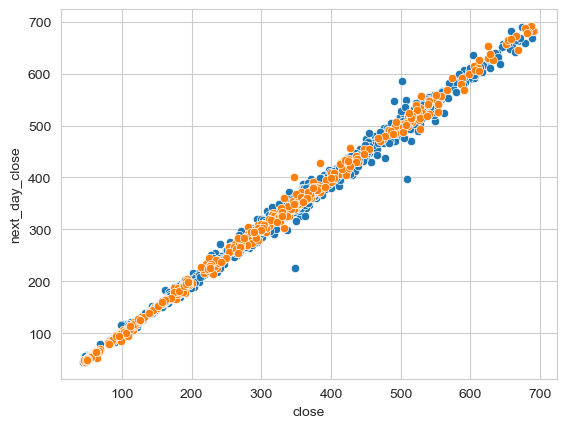

In [32]:
sns.scatterplot(x = x_train['close'], y = y_train['next_day_close'])
sns.scatterplot(x = x_test['close'], y = y_test['next_day_close'])
plt.show()

Tạo Model từ thư viện Linear Regression

Tiến hành train model bằng hàm fit. Nhận vào 2 tham số là x_train và y_train

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

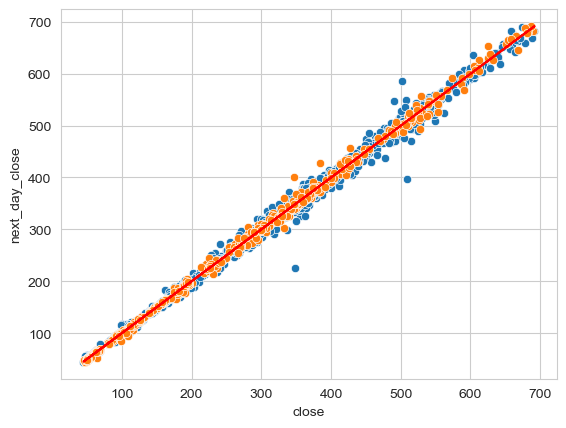

In [34]:
sns.scatterplot(x = x_train['close'], y = y_train['next_day_close'])
sns.scatterplot(x = x_test['close'], y = y_test['next_day_close'])
plt.plot(np.array(x), lr.predict(x), color='red')
plt.show()


Sau khi Model đã được train, thì tiến hành dùng hàm predict để dự đoán kết quả, trong đó:

- y_train_predict là kết quả dự đoán từ tập x_train

- y_train là tập kết quả thực tế từ dữ liệu được chia ra bên trên

- mse_train là kết quả chênh lệch - loss function giữa y_train_predict và y_train

- Tương tự với mse_test

In [35]:
y_train_predict = lr.predict(x_train)
mse_train = mean_squared_error(y_train_predict, y_train)

y_test_predict = lr.predict(x_test)
mse_test = mean_squared_error(y_test_predict, y_test) 

Tạo một dictionary để lưu trữ mse_train và mse_test. Và dễ trực quan hóa mối quan hệ của 2 tập train và test bằng đồ thị

In [36]:
mse_dict = {}
mse_dict['RMSE - Only 1 Field'] = [mse_train**0.5 , mse_test**0.5 ] 

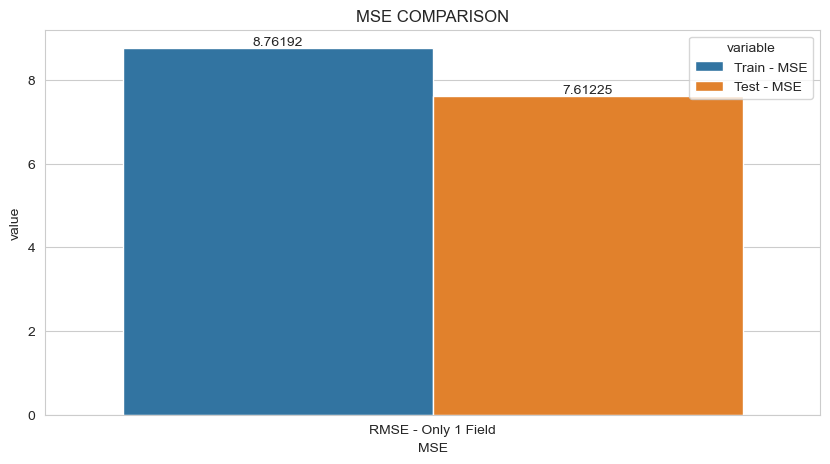

In [37]:
#Đồ thị vẽ chart, tương quan giữa các tham số MSE
def show_mse_char(mse_dict):
    dfplot = pd.DataFrame(mse_dict).T.reset_index()
    dfplot.columns = ['MSE', 'Train - MSE', 'Test - MSE']
    dfplot = pd.melt(dfplot, id_vars= 'MSE', value_vars= ['Train - MSE', 'Test - MSE'])

    # Plot:
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data = dfplot, x = 'MSE', y = 'value', hue = 'variable')
    plt.title('MSE COMPARISON')
    for i in range(dfplot.variable.nunique()):
        plt.bar_label(ax.containers[i])
    plt.show()
    
show_mse_char(mse_dict)

Lần này sẽ train model bằng nhiều trường dữ liệu, để tăng độ chính xác

In [38]:
x = df[['open', 'high', 'low', 'close','volume','rsi_14', 'ema_100', 'macd', 'bollinger']]
y = df['next_day_close']

In [39]:
evaluate_models(x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 9
[LightGBM] [Info] Start training from score 274.652630


,Model,RMSE,R2
0,Linear Regression,8.498649,0.997374
1,Ridge Regression,9.028083,0.997037
2,Lasso Regression,9.615572,0.996639
3,ElasticNet,92.778758,0.687077
4,Decision Tree Regressor,0.000000,1.000000
5,Random Forest Regressor,3.465695,0.999563
6,Support Vector Machine Regressor,30.709222,0.965717
7,K-Nearest Neighbors Regressor,7.508206,0.997951
8,Gradient Boosting Regressor,6.557516,0.998437
9,XGBoost Regressor,1.960897,0.999860


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
y_train_predict = lr.predict(x_train)
mse_train = mean_squared_error(y_train_predict, y_train)

y_test_predict = lr.predict(x_test)
mse_test = mean_squared_error(y_test_predict, y_test) 

In [43]:
mse_dict['RMSE - All Field'] = [mse_train**0.5, mse_test**0.5]

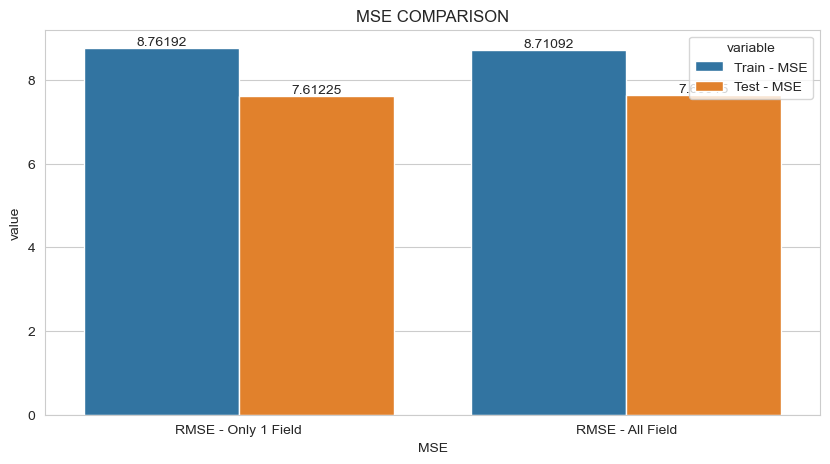

In [44]:
show_mse_char(mse_dict)

Nhận xét:
- Giá trị lost function đã giảm xuống khá nhiều
- Độ chính xác của model đang được cải thiện

Sử dụng MinMaxScaler để scale dữ liệu.
Tất cả giá trị sẽ được scale xuống thành khoảng (0 - 1)

Tuy nhiên, mức độ phân phối của dữ liệu vẫn được bảo toàn

In [45]:
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [46]:
x_train_scaler[1][:5]

array([0.52748002, 0.52728179, 0.51732013, 0.53480414, 0.03905179])

Sau khi đã scale, thì cho vào model học tiếp tục

In [47]:
lr = LinearRegression()
lr.fit(x_train_scaler, y_train)

LinearRegression()

Sau khi đã học xong thì tiến hành dự đoán như những bước trên

Và tính các giá trị mse của tập train và tập test

In [48]:
y_train_predict = lr.predict(x_train_scaler)
mse_train = mean_squared_error(y_train_predict, y_train)

y_test_predict = lr.predict(x_test_scaler)
mse_test = mean_squared_error(y_test_predict, y_test) 

In [49]:
mse_dict["RMSE Using MinMaxScaler"] = [mse_train**0.5, mse_test**0.5]

In [59]:
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429
1,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142
2,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000
3,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856
4,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002


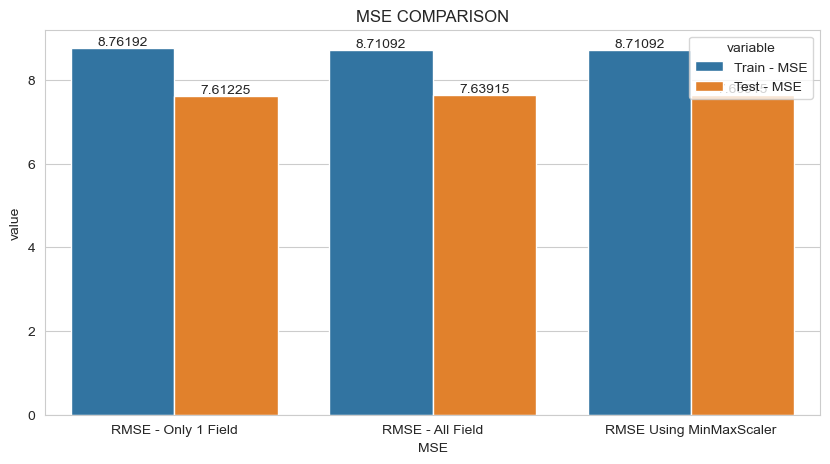

In [50]:
show_mse_char(mse_dict)

Nhận xét:
Không có thay đổi. Do tập dữ liệu gốc không quá chênh nhau về giá trị

Sử dụng Polynomial (đa thức) thay vì Linear (Phương trình tuyến tính) để dự đoán.

Trước hết cần xác định bật của đa thức là bao nhiêu, thì mới tối ưu.

Cho vào vòng for, và lưu lại các giá trị mse của 2 tập Train và Test.

Trực quan hóa bằng đồ thị, sau đó chọn bậc thích hợp và tốt nhất.

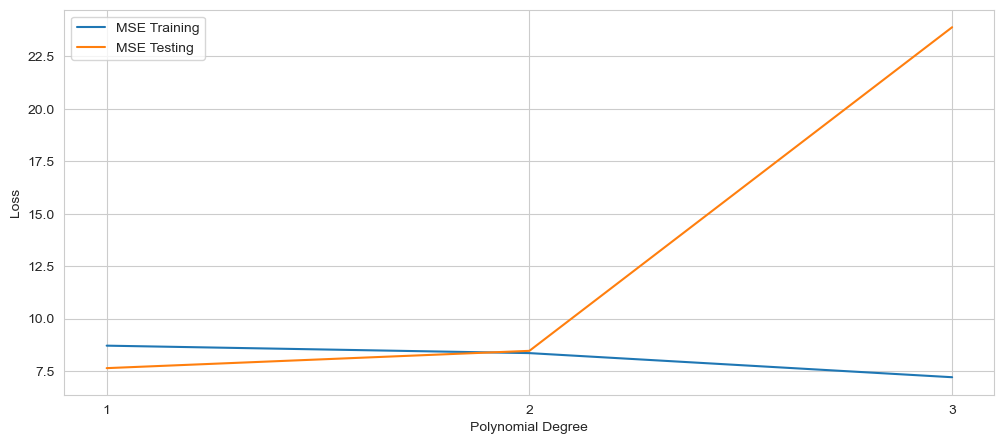

In [51]:
rs = {'degree': [], 'mse_train': [], 'mse_test': []}
for i in range(1, 4):
    lr = LinearRegression()
    pf = PolynomialFeatures(degree=i)

    x_train_poly = pf.fit_transform(x_train_scaler)
    x_test_poly = pf.transform(x_test_scaler)

    lr.fit(x_train_poly, y_train)

    y_train_poly_predict = lr.predict(x_train_poly)
    y_test_poly_predict = lr.predict(x_test_poly)

    mse_train = mean_squared_error(y_train_poly_predict, y_train)
    mse_test = mean_squared_error(y_test_poly_predict, y_test)

    rs['degree'].append(i)
    rs['mse_train'].append(mse_train**0.5)
    rs['mse_test'].append(mse_test**0.5)

result_df = pd.DataFrame(rs)
result_df.head()



# Plot MSE 
fig = plt.subplots(figsize =(12, 5))
# Make the plot
plt.plot(result_df['degree'], result_df['mse_train'],label ='MSE Training')
plt.plot(result_df['degree'], result_df['mse_test'], label ='MSE Testing')
 
# Adding Xticks
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')

plt.xticks(result_df['degree'])
 
plt.legend()
plt.show()


Nhận xét: 
- Bật 2 là bật tốt nhất, vì giá trị loss function của tập Train và tập Test giao nhau => Mức độ phù hợp giữa tập Train và tập Test cao nhất => Model càng tốt

Sau khi đã chọn được bật, thì tạo lại model dưới bậc đó, sau đó vẫn cho train từ tập dữ liệu Train

In [52]:
lr = LinearRegression()
pf = PolynomialFeatures(degree=2)

x_train_poly = pf.fit_transform(x_train_scaler)
x_test_poly = pf.transform(x_test_scaler)

lr.fit(x_train_poly, y_train)

y_train_poly_predict = lr.predict(x_train_poly)
y_test_poly_predict = lr.predict(x_test_poly)

mse_train = mean_squared_error(y_train_poly_predict, y_train)
mse_test = mean_squared_error(y_test_poly_predict, y_test)

In [53]:
mse_dict["RMSE Using Polynomial"] = [mse_train**0.5, mse_test**0.5]

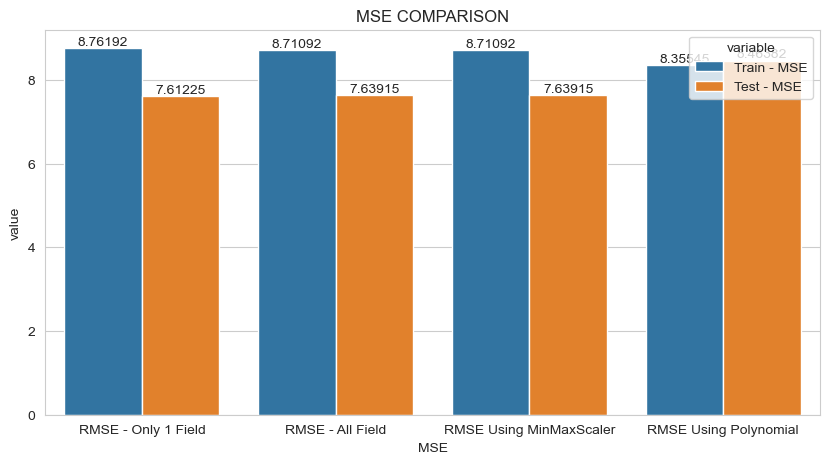

In [54]:
show_mse_char(mse_dict)

In [55]:
df.sample(5)

,open,high,low,close,volume,rsi_14,ema_100,macd,bollinger,next_day_close
1880,498.540009,513.549988,495.799988,508.820007,5809300,58.073579,509.377809,-0.594409,496.544496,512.739990
709,126.519997,128.059998,125.750000,126.510002,8253900,78.010489,100.467100,7.168905,108.205500,126.970001
133,64.384285,64.481430,63.181431,64.155716,13505800,56.107317,57.391007,1.294208,63.980857,63.491428
1868,492.000000,501.859985,490.950012,494.739990,3160500,44.741850,513.239612,-3.794141,495.442998,494.660004
168,68.645714,69.657143,68.075714,68.198570,16219000,66.102595,61.113570,1.504728,66.319072,67.524284


In [60]:
x_predict = [[126.519997,	128.059998,	125.750000,	126.510002,	8253900,	78.010489,	100.467100,	7.168905,	108.205500	]]
y_predict = lr.predict(pf.transform(scaler.transform(x_predict)))

print(y_predict)

[127.29935978]
